### Second law efficiency of a solar energy collection process 

You are designing a solar energy collection system capable of collecting 10 MW of solar energy. This energy can be used for heating or for generating electricity with a steam power cycle, e.g., Rankine (states 1 to 4). The system consists of the following:
- pump (states 5 to 6)
- heat transfer fluid ([DowTherm Q Heat Transfer Fluid](https://www.dow.com/en-us/pdp.dowtherm-q-heat-transfer-fluid.11233z.html#overview))
- parabolic mirrors
- receivers (fluid enters at state 6 and exits at state 7)
- heat exchanger (e.g., boiler; fluid enters at state 7 and exits at state 8)
- storage tank (fluid enters at state 8 and exits at state 5)

The temperature of the heat transfer fluid when it exits the receiver is 360 C and its pressure is 5 bar. You are told to neglect the work transfer from the pump in this analysis. Assume an insolation value of 250 W/m$^2$. 

Please define:
- (a) Assuming thermal equilibrium, what is the minimum value of $C_\text{opt}$ (optical concentration) required to heat the receiver to the exit temperature mentioned above? 
- (b) Please define the second law efficiency of the solar collector as a function of the inlet heat transfer fluid temperature to the reciever, which is varied between 25 C and 350 C. This temperature would be expected to be close to the tank temperature.
- (c) Please define the rate of exergy destruction in the heat exchanger. For this, please assume that the heat exchanger is a boiler, which generates steam at a pressure of 100 bar and temperature of 300 C and that the surface condenser operates at a pressure of 75 kPa. 

#### Part (a)
At thermal equilibrium, the absorbed (insolation) and emitted radiation ($\dot{P}_\text{receiver}$) must be equal. The value for insolation is given above. The value for the radiation emitted is then:

$$\dot{P}_\text{receiver} = \epsilon \sigma T_\text{outlet}^4 $$

In [7]:
epsilon = 1
sigma_WperM2perK4 = 5.67e-8
Toutlet_K = 273.15+360

Preceiver_WperM2 = epsilon*sigma_WperM2perK4*(Toutlet_K**4)
Pinsolation_WperM2 = 250

Copt = Preceiver_WperM2/Pinsolation_WperM2

print('The minimum value for C_opt is: {0:1.2f}'.format(Copt))

The minimum value for C_opt is: 36.45


#### Part (b)

Second law efficiency can be defined as:
$$\eta_\text{II} = \frac{\text{Exergy recovered}}{\text{Exergy expended}} $$

For our problem here, the rate that exergy is expended is: 

$$ \dot{X}_\text{expended} = \left(1 - \frac{T_0}{T_\text{sun}} \right) \dot{Q}_\text{sun} + \dot{X}_\text{pump} + \dot{X}_\text{inlet}$$

The rate that exergy is recovered is:

$$\dot{X}_\text{recovered} = \dot{X}_\text{outlet} $$

The second law efficiency is then:

$$\eta_\text{II} = \frac{\dot{X}_\text{recovered}}{\dot{X}_\text{expended}} = \frac{\dot{X}_\text{outlet}}{\left(1 - \frac{T_0}{T_\text{sun}} \right) \dot{Q}_\text{sun} + \dot{X}_\text{pump} + \dot{X}_\text{inlet}}$$

The inlet and outlet exergy terms are:

$$ \dot{X}_\text{inlet} = \dot{m}\left[ 
\left(h_\text{inlet} - h_0\right) - T_0 \left( s_\text{inlet} - s_0 \right) \right]$$

$$ \dot{X}_\text{outlet} = \dot{m}\left[ 
\left(h_\text{outlet} - h_0\right) - T_0 \left( s_\text{outlet} - s_0 \right) \right]$$

To analyze this, we can make a choice about the system. We can assume that there is a reservoir that contains the heat transfer fluid prior to entering the inlet of the receiver. 

In [8]:
!pip install CoolProp

In [9]:
from CoolProp.CoolProp import PropsSI

In [10]:
# here you have to write INCOMP:: before the fluid name, in this case
# DowQ in order to call the fluid. It is an incompressible fluid. 
fluidHeatTransfer = 'INCOMP::DowQ'

In [11]:
# Temperature units are in Kelvin
# Pressure units are in Pascals
# Enthalpy units are in J/kg
# Entropy units are in J/kg/K
# Density units are in kg/m3

In [12]:
# State 5, exiting the tank and entering the pump
T5 = 200+273.15
p5 = 5e5

h5 = PropsSI('H','T',T5,'P',p5,fluidHeatTransfer)
s5 = PropsSI('S','T',T5,'P',p5,fluidHeatTransfer)

In [13]:
# State 8, we assume that the storage tank is adiabatic and no major pressure changes
T8 = T5
p8 = p5 # we assume no pressure drop across the storage tank

h8 = PropsSI('H','T',T8,'P',p8,fluidHeatTransfer)
s8 = PropsSI('S','T',T8,'P',p8,fluidHeatTransfer)

In [14]:
# State 7
T7 = 360+273.15
p7 = p8 # no pressure drop across a heat exchanger

h7 = PropsSI('H','T',T7,'P',p7,fluidHeatTransfer)
s7 = PropsSI('S','T',T7,'P',p7,fluidHeatTransfer)

In [15]:
# State 6, we are neglecting any work transfer from the pump
# so the properties will be the sae as state 5
T6 = T5
p6 = p5

h6 = PropsSI('H','T',T6,'P',p6,fluidHeatTransfer)
s6 = PropsSI('S','T',T6,'P',p6,fluidHeatTransfer)

In [16]:
QdotIn_W = 10e6

mdot_kgPerS = QdotIn_W/(h7 - h6); print(mdot_kgPerS)

25.595087166313462


In [17]:
# The dead state properties:
T0 = 25+273.15
p0 = 101325

h0 = PropsSI('H','T',T0,'P',p0,fluidHeatTransfer)
s0 = PropsSI('S','T',T0,'P',p0,fluidHeatTransfer)

In [18]:
# Exergy recovered
XdotOutlet_W = mdot_kgPerS*((h7 - h0) - T0*(s7 - s0)); print(XdotOutlet_W)

6533960.503396098


In [19]:
# Exergy expended
XdotInlet_W = mdot_kgPerS*((h6 - h0) - T0*(s6 - s0)); print(XdotInlet_W)
XdotPump_W = 0
QdotSun_W = QdotIn_W

Tsun_K = 5772
XdotSun_W = QdotSun_W*(1 - (T0/Tsun_K)); print(XdotSun_W)

1937087.0055465845
9483454.60845461


In [20]:
eta_II = XdotOutlet_W/(XdotInlet_W+XdotPump_W+XdotSun_W); print(eta_II)

0.572123523054781


#### Part (c)

In order to analyze the exergy destruction in the heat exchanger, we make the following assumptions:
- the heat exchanger is adiabatic with respect to the surroundings.
- the water exits the condenser (state 1) with a quality of zero. 

In [32]:
# state 1
x1 = 0
p1_kPa = 75
p1_MPa = p1_kPa/1000

# state 3
p3_MPa = 10
T3_K = 300+273.15

In [33]:
!pip install iapws

In [34]:
from iapws import IAPWS97

In [35]:
# exit of condenser
state1 = IAPWS97(P=p1_MPa, x=x1)

In [36]:
# exit of pump
p2_MPa = p3_MPa

state2 = IAPWS97(P=p2_MPa, s=state1.s)

In [62]:
# exit of heat exchanger, aka boiiler
state3 = IAPWS97(P=p3_MPa, T=T3_K)

Qdot23_W = mdot_kgPerS*(h7-h8); print(Qdot23_W)
Qdot23_kW = Qdot23_W/1e3

mdotWater_kgPerS = Qdot23_kW/(state3.h - state2.h); print(mdotWater_kgPerS)

10000000.0
10.543423837604657


The rate of exergy destruction at steady state for two streams entering an adiabatic control volume with no work interaction at state 2 and 7 and exiting at state 3 and 8 are defined as:

$$\dot{X}_\text{destroyed} = \dot{m}_\text{water}(\psi_2 - \psi_3) + \dot{m}_\text{htf}(\psi_7 - \psi_8) $$

where (neglecting kinetic and potential energy effects)

$$\psi_2 - \psi_3 = (h_2 - h_3) - T_0(s_2 - s_3)$$

In [65]:
Xdestroyed_kW = mdotWater_kgPerS*((state2.h - state3.h) - T0*(state2.s - state3.s)) + mdot_kgPerS*(((h7 - h8 )/1000) - (T0*(s7 - s8)/1000) )

print('(c) The rate of exergy destruction in the heat exchanger is: {0:1.2f} kW.'.format(Xdestroyed_kW))

(c) The rate of exergy destruction in the heat exchanger is: 995.21 kW.


In [66]:
cold = mdotWater_kgPerS*((state3.h - state2.h) - T0*(state3.s - state2.s)) # 3 minus 2
hot = mdot_kgPerS*(((h7 - h8 )/1000) - (T0*(s7 - s8)/1000) )  # 7 minus 8

eta_II_HX = cold/hot

print('(c) The second law efficiency of the heat exchanger is: {0:1.2f} %.'.format(eta_II_HX*100))

(c) The second law efficiency of the heat exchanger is: 78.35 %.


In [67]:
import numpy as np
import matplotlib.pyplot as plt

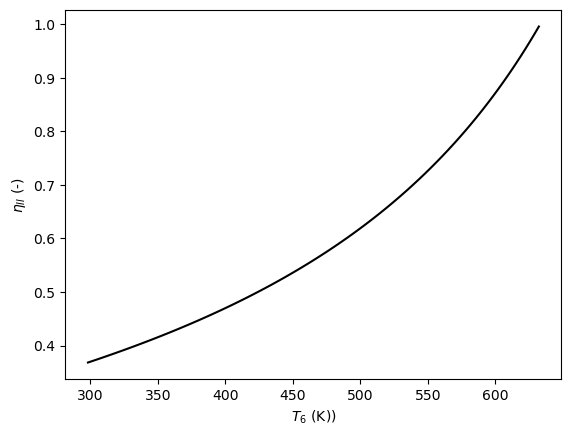

In [68]:
plt.figure()
plt.clf()
steps = 100

Tmax_K = 359+273.15
h0_kJperKg = PropsSI('H','T',T0,'P',p0,fluidHeatTransfer)
T0_K = T0
s0_kJperKgperK = s0

T_ = np.linspace(25+273.15, Tmax_K, steps) # range of temperatures
h0_ = np.linspace(h0_kJperKg, h0_kJperKg, steps) 
T0_ = np.linspace(T0_K, T0_K, steps)
s0_ = np.linspace(s0_kJperKgperK, s0_kJperKgperK, steps)
Xsun_ = np.linspace(XdotSun_W, XdotSun_W, steps)

T6_ = T_
s6_ = [PropsSI('S','T',t,'P',p6,fluidHeatTransfer) for t in T_]
h6_ = [PropsSI('H','T',t,'P',p6,fluidHeatTransfer) for t in T_]

s7_ = np.linspace(s7, s7, steps)
h7_ = np.linspace(h7, h7, steps)
T7_ = np.linspace(T7, T7, steps)
QdotIn_W_ = np.linspace(QdotIn_W, QdotIn_W, steps)
XdotSun_W_ = np.linspace(XdotSun_W,XdotSun_W,steps)

mdot_ = QdotIn_W_/(h7_ - h6_)

XdotInlet_W_ = mdot_*((h6_ - h0_) - T0_*(s6_ - s0_))
XdotOutlet_W_ = mdot_*((h7_ - h0_) - T0_*(s7_ - s0_))

DeltaT76_ = T7_ - T_

eta_II_ = XdotOutlet_W_/(XdotInlet_W_ + XdotSun_W_)

plt.plot(T_, eta_II_, 'k-')

plt.xlabel('$T_{6}$ (K))')
plt.ylabel('$\eta_{II}$ (-)')
plt.savefig('eta-Tin.png')

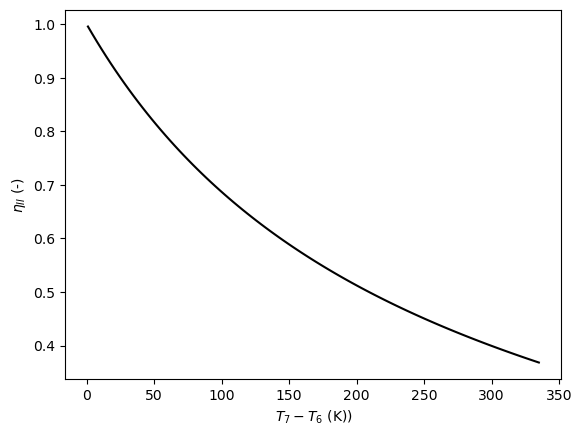

In [69]:
plt.plot(DeltaT76_, eta_II_, 'k-')

plt.xlabel('$T_{7} - T_{6}$ (K))')
plt.ylabel('$\eta_{II}$ (-)')
plt.savefig('eta-deltatT.png')

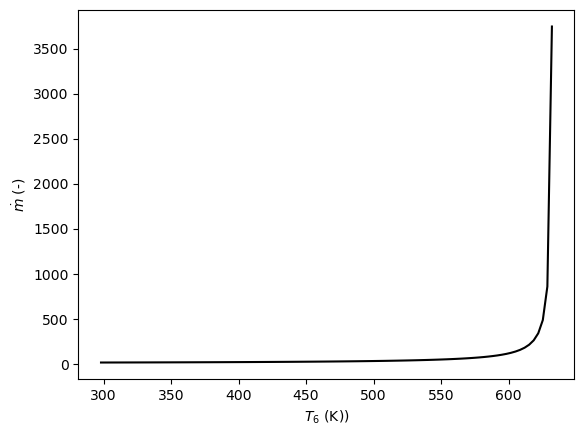

In [70]:
plt.figure()
plt.clf()

plt.plot(T_, mdot_, 'k-')

plt.xlabel('$T_{6}$ (K))')
plt.ylabel('$\dot{m}$ (-)')
plt.savefig('eta-mdot.png')

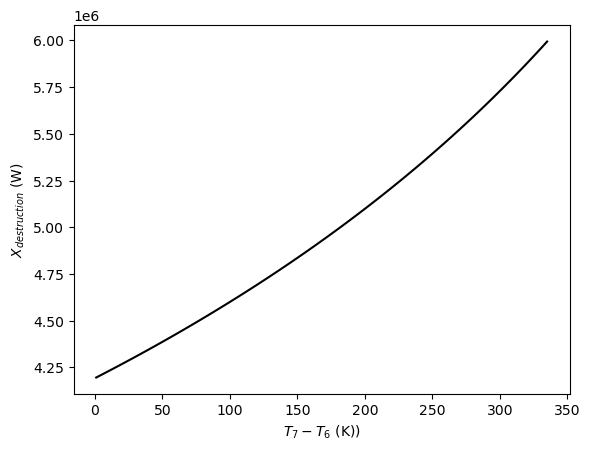

In [71]:
plt.figure()
plt.clf()

# Xrecovered_W_ = XdotOutlet_W_

Xdest_W__ = XdotSun_W_ + XdotInlet_W_ - XdotOutlet_W_

plt.plot(DeltaT76_, Xdest_W__, 'k-')

plt.xlabel('$T_{7} - T_{6}$ (K))')
plt.ylabel('$X_{destruction}$ (W)')
plt.savefig('eta-Xdestruction_2.png')